In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('blackFriday_test.csv')
df1= pd.read_csv('blackFriday_train.csv')

In [3]:
print(df.columns) 
print(df.shape)

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')
(233599, 11)


In [4]:
print(df1.columns)
print(df1.shape)

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')
(550068, 12)


In [5]:
Df =  df1.append(df)

C:\Users\vampi\AppData\Local\Temp\ipykernel_10540\599109131.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Df =  df1.append(df)


In [6]:
Df.shape

(783667, 12)

In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [8]:
df1.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
Df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [10]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [11]:
df.isnull().sum().sum()

234906

In [12]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [13]:
cat_col =[x for x in df.columns if df[x].dtype == 'O']

In [14]:
cat_col

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [15]:
Num_col =[x for x in df.columns if df[x].dtype != 'O']

In [16]:
Num_col

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

 #  Handling of missing data

In [17]:
Df_copy = Df.copy()

In [18]:
Df_copy.shape

(783667, 12)

In [19]:
Df_copy.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

We have huge number of rows which are having missing value so we can't drop the rows .

* Filling missing data with Mode of respective columns

In [20]:
Df_copy['Product_Category_2'] = Df_copy['Product_Category_2'].fillna(Df_copy['Product_Category_2'].mode()[0])   

In [21]:
Df_copy['Product_Category_3'] = Df_copy['Product_Category_3'].fillna(Df_copy['Product_Category_3'].mode()[0])

In [22]:
Df_copy['Purchase'] = Df_copy['Purchase'].fillna(Df_copy['Purchase'].mode()[0])

In [23]:
Df_copy.Product_Category_2.isnull().sum()

0

In [24]:
Df_copy.Product_Category_3.isnull().sum()

0

In [25]:
Df_copy.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [26]:
Df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [27]:
Df.shape

(783667, 12)

In [28]:
Df_copy.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.265541,14.988858,8592.393620
std,1.727267e+03,6.522206,0.491793,3.878160,4.301427,2.740792,4332.686969
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,8.000000,16.000000,6996.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,8.000000,16.000000,7011.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,16.000000,9927.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [29]:
Df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [30]:
Df_copy.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969.0


In [ ]:
# Comparing plots with and without null values of Df and Df_copy.

C:\Users\vampi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Product_Category_2', ylabel='Product_Category_3'>

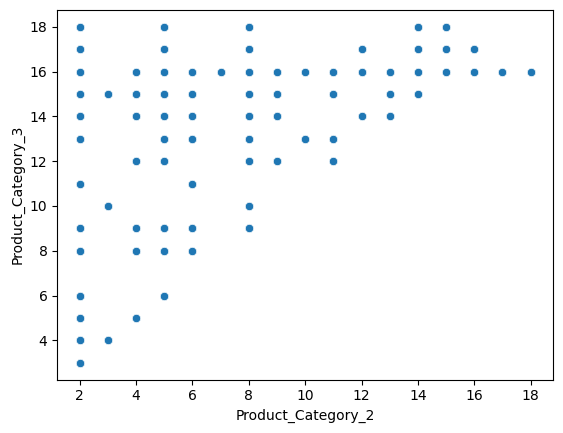

In [40]:
sns.scatterplot(Df_copy['Product_Category_2'],Df_copy['Product_Category_3'])

C:\Users\vampi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Product_Category_2', ylabel='Product_Category_3'>

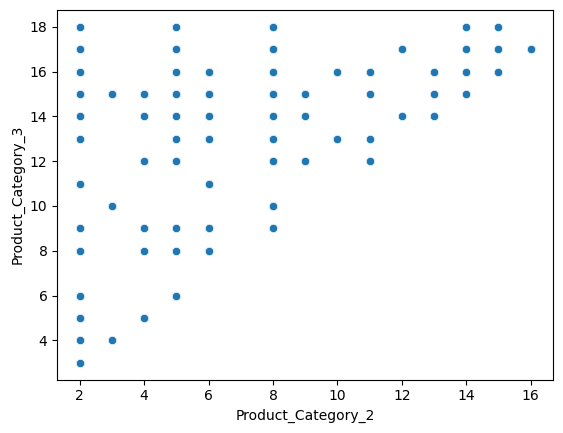

In [41]:
sns.scatterplot(Df['Product_Category_2'],Df['Product_Category_3'])

C:\Users\vampi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Product_Category_2', ylabel='Purchase'>

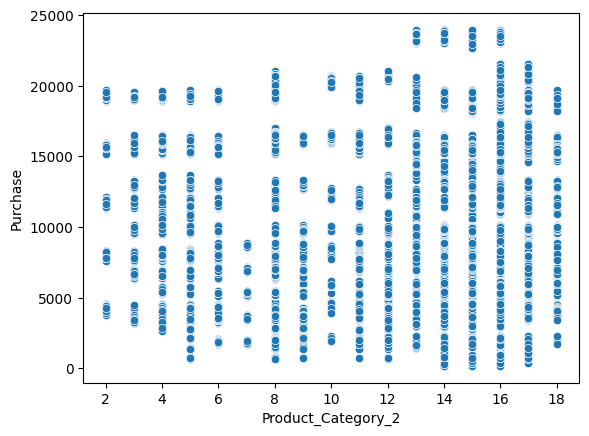

In [45]:
sns.scatterplot(Df['Product_Category_2'],Df['Purchase'])

C:\Users\vampi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Product_Category_2', ylabel='Purchase'>

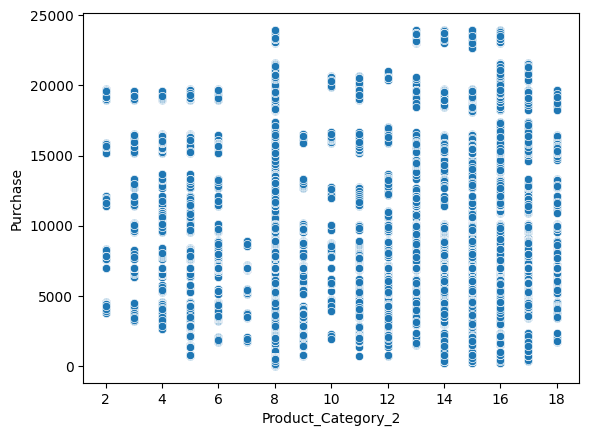

In [46]:
sns.scatterplot(Df_copy['Product_Category_2'],Df_copy['Purchase'])

* Deleting Rows contaning Null values

In [54]:
Df_copy1 = Df.copy()

In [55]:
Df_copy1.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [67]:
df1 = Df_copy1.dropna()
print(df1.shape)

(166821, 12)


In [64]:
Df_copy1.shape

(783667, 12)

In [65]:
df1.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

C:\Users\vampi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Product_Category_2', ylabel='Product_Category_3'>

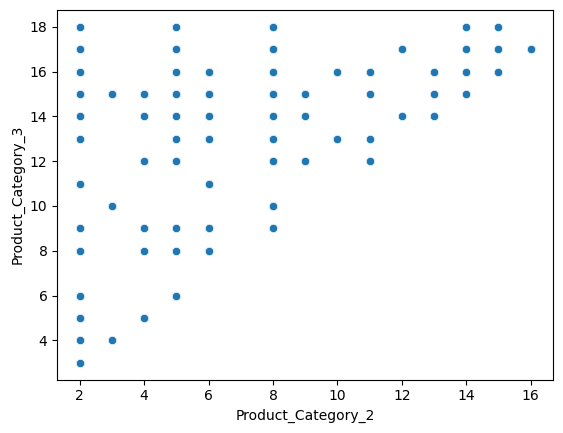

In [68]:
sns.scatterplot(Df_copy1['Product_Category_2'],Df_copy1['Product_Category_3'])

C:\Users\vampi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Product_Category_2', ylabel='Product_Category_3'>

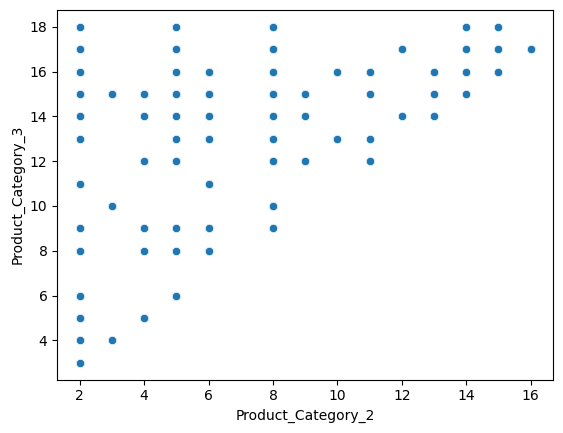

In [69]:
sns.scatterplot(df1['Product_Category_2'],df1['Product_Category_3'])

C:\Users\vampi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Product_Category_2', ylabel='Purchase'>

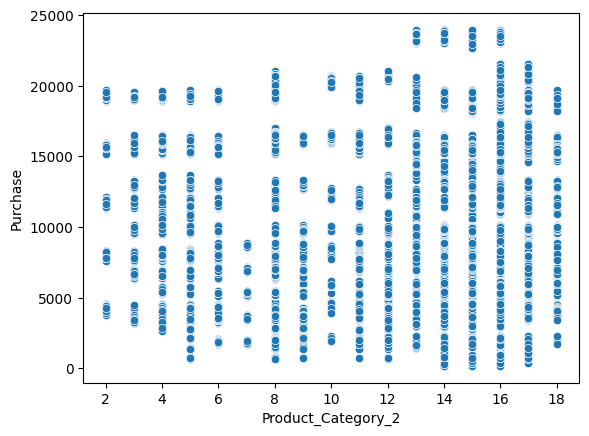

In [72]:
sns.scatterplot(Df_copy1['Product_Category_2'],Df_copy1['Purchase'])

C:\Users\vampi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Product_Category_2', ylabel='Purchase'>

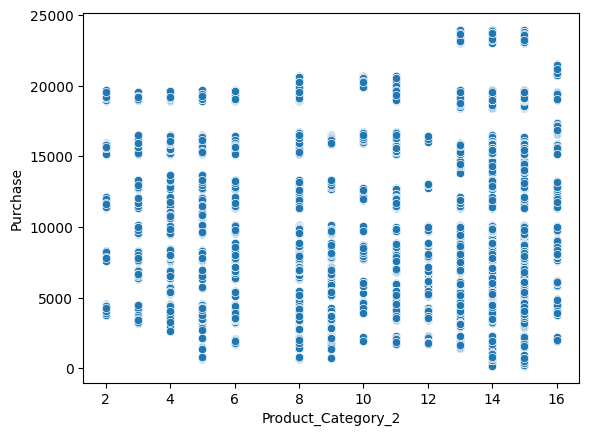

In [73]:
sns.scatterplot(df1['Product_Category_2'],df1['Purchase'])

* Filling NAN values with mean

In [74]:
Df_copy2 = Df.copy()

In [76]:
Df_copy2.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [78]:
Df_copy2['Product_Category_2'] = Df_copy2['Product_Category_2'].fillna(Df_copy2['Product_Category_2'].mean())

In [79]:
Df_copy2['Product_Category_3'] = Df_copy2['Product_Category_3'].fillna(Df_copy2['Product_Category_3'].mean())

In [80]:
Df_copy2['Purchase'] = Df_copy2['Purchase'].fillna(Df_copy2['Purchase'].mean())

In [81]:
Df_copy2.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

C:\Users\vampi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Product_Category_2', ylabel='Product_Category_3'>

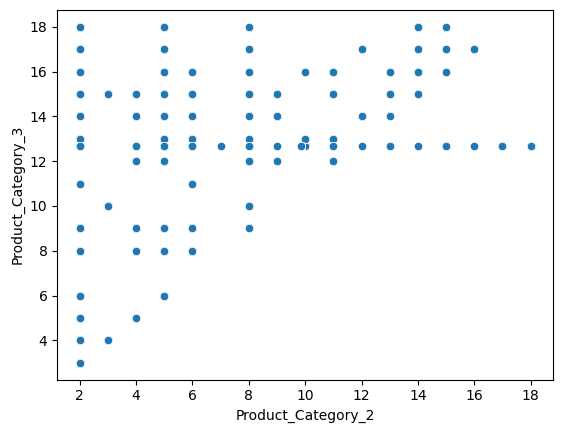

In [82]:
sns.scatterplot(Df_copy2['Product_Category_2'],Df_copy2['Product_Category_3'])

C:\Users\vampi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Product_Category_2', ylabel='Purchase'>

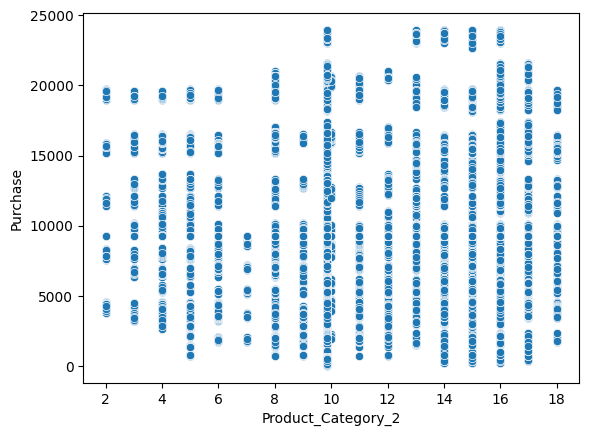

In [84]:
sns.scatterplot(Df_copy2['Product_Category_2'],Df_copy2['Purchase'])